c:\Users\MariaFiore\Desktop\LFN\lfn-ke\graph_utils.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbors'][ind]=[ss for ss in stemmed_sent if not(ss==stem)]


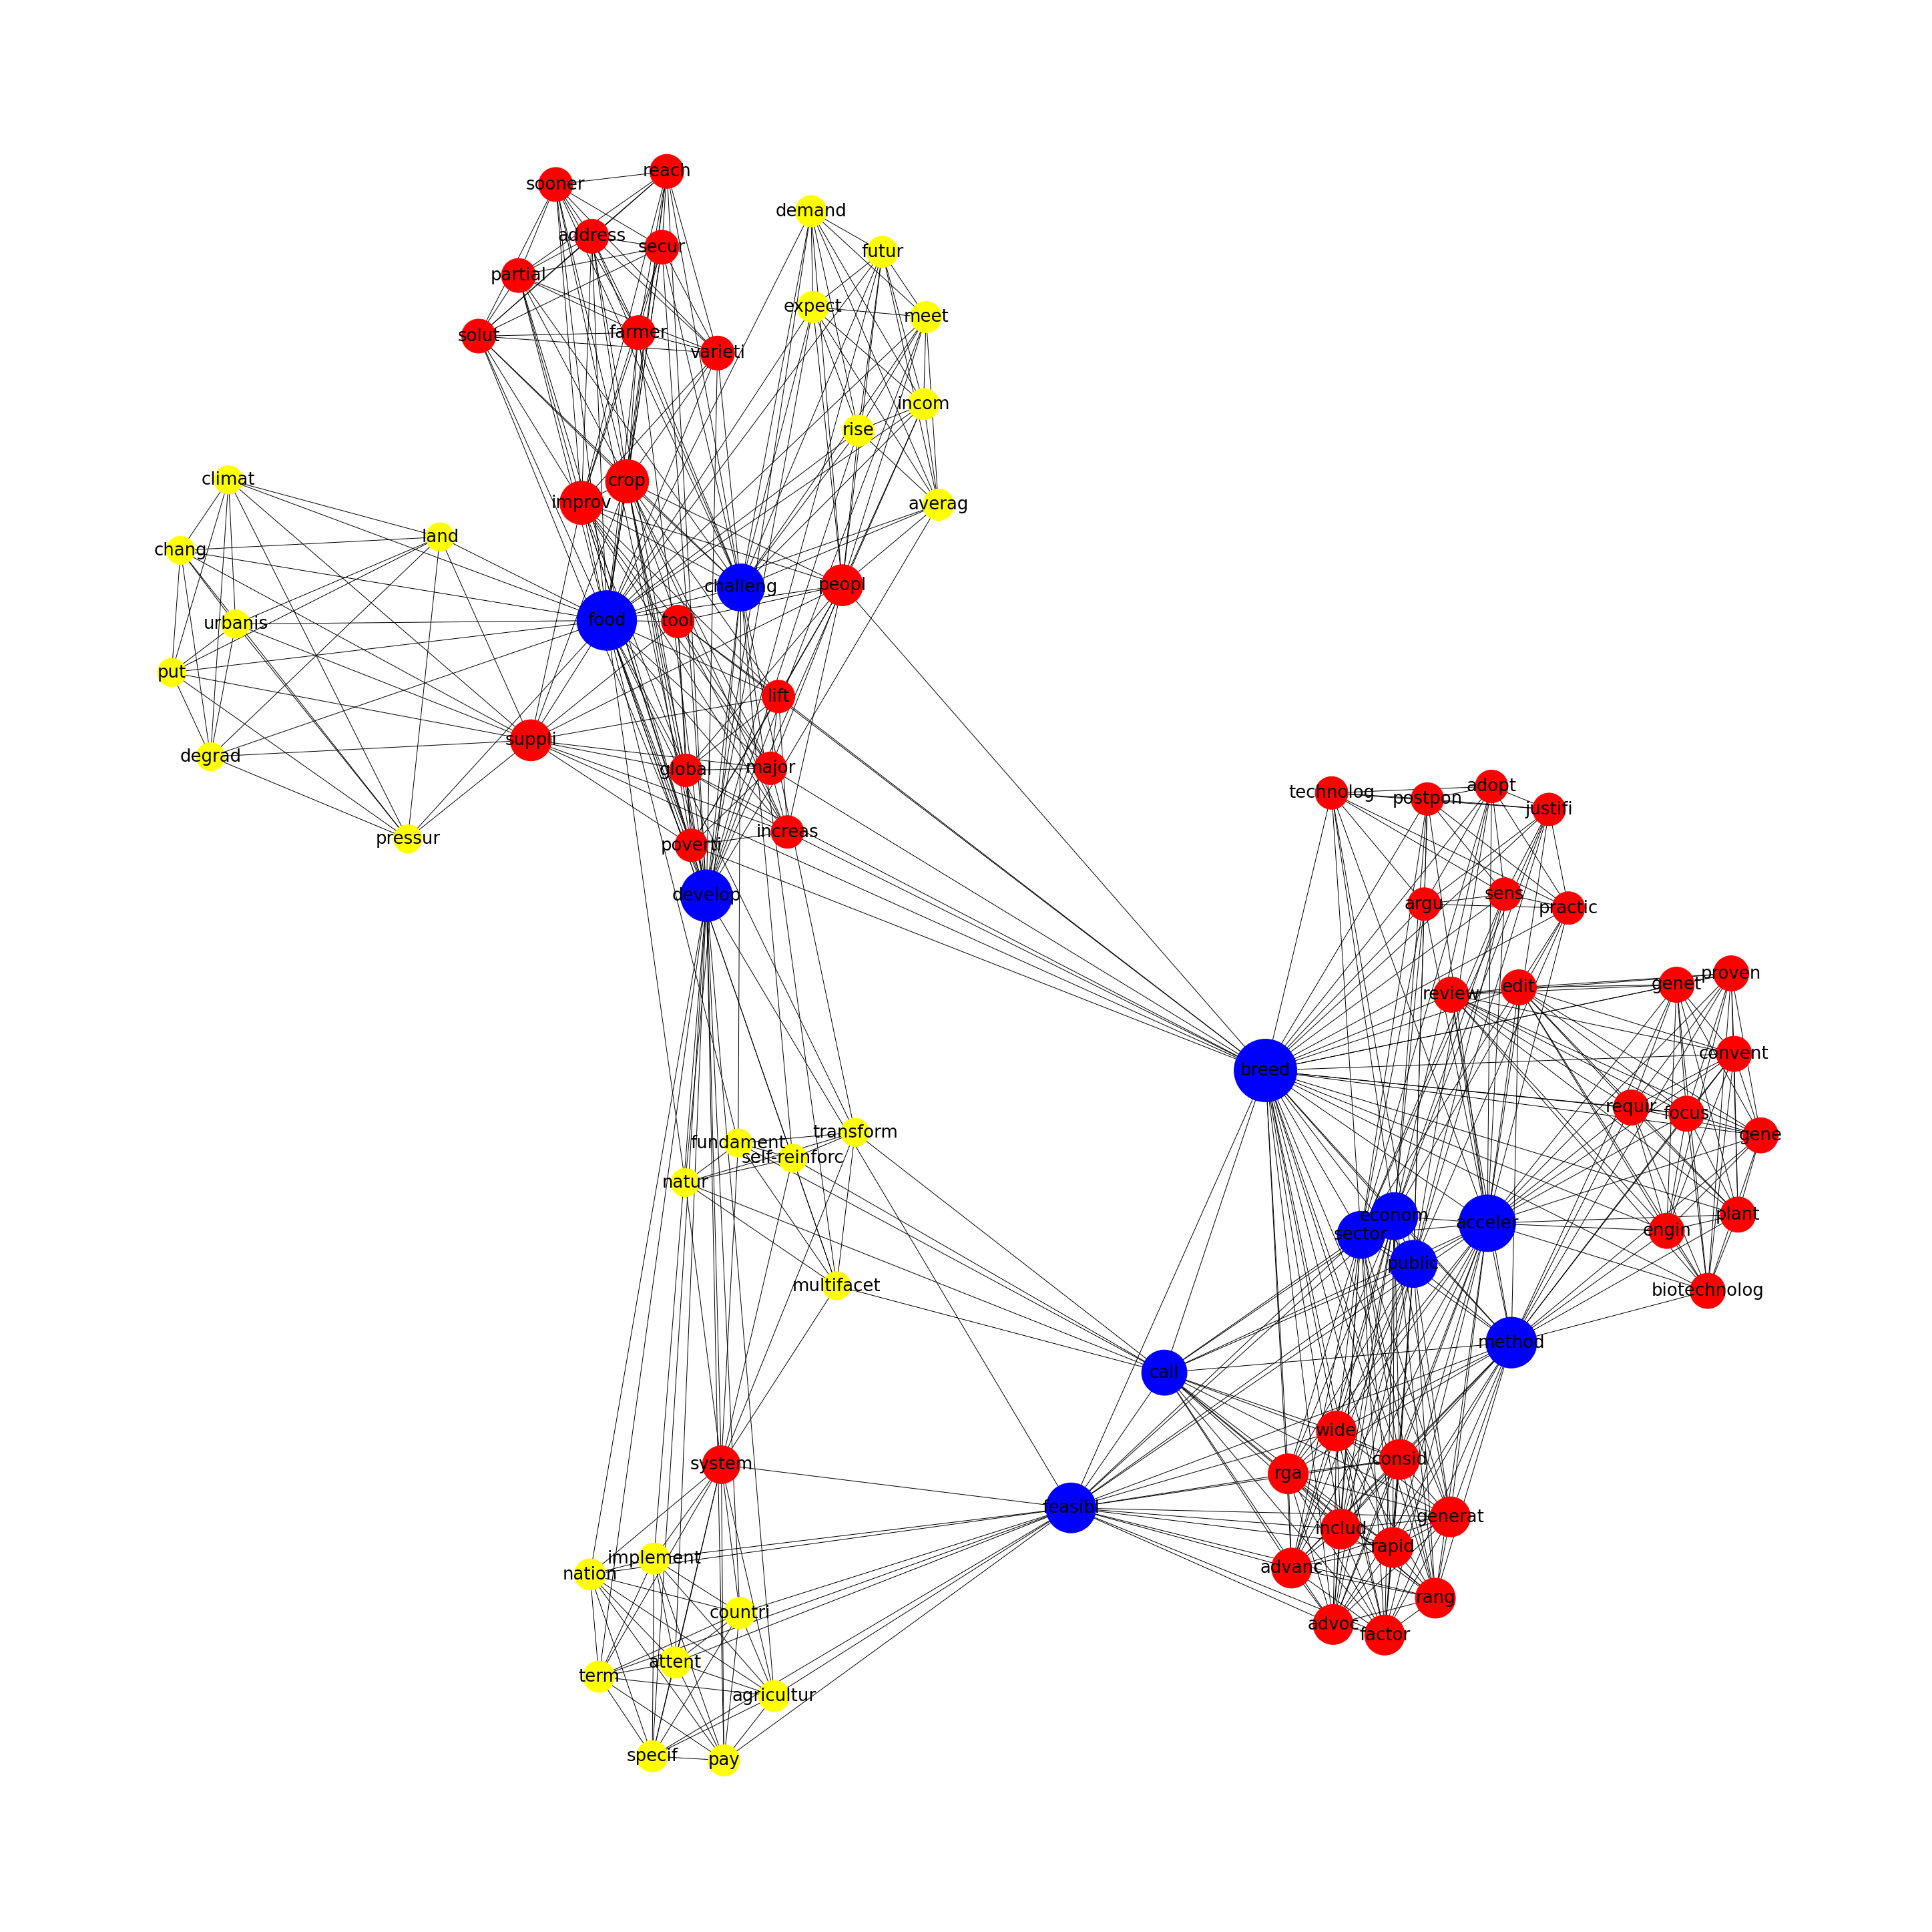

In [1]:
import graph_utils
import networkx as nx
import parse_utils
import numpy as np

#sampling articles in json format and creating a list of Article objects

parsed_articles = parse_utils.parse_and_sample("..\json\json", 1)

#creating a GraphMaker object that encapsulates the chosen stemmer and stopwords list

gm = graph_utils.GraphMaker('resources\longStopwords.txt','SNO')

# setting up a proper nx.Graph() as Article's co-occurrence graph 

for a in parsed_articles:
    a.setGraph(gm)

#If one wanted to print a graph, given an article:

graph_utils.printGraph(parsed_articles[0].graph)


# computing our approximate centralities and setting the centrality values as attributes for the nodes

for a in parsed_articles:

    myDictionary = graph_utils.approximateClosenessCentrality(a.graph, 10)
    nx.set_node_attributes(a.graph, myDictionary, name = 'apprCC')

    nx.set_node_attributes(a.graph, graph_utils.localPageRankApprox(a.graph), name = 'apprPR')

    nx.set_node_attributes(a.graph, graph_utils.improvedEstimateLCC(a.graph,  0.7), name='apprLCC')




In [2]:
myDictionary= nx.pagerank(ggraph,0.4)
print(myDictionary)

AttributeError: module 'numpy' has no attribute 'pagerank'